# Tutorial for Image IO Features in MLCBase

[![PyPI](https://img.shields.io/pypi/v/mlcbase)](https://pypi.org/project/mlcbase/) &nbsp;
[![license](https://img.shields.io/github/license/wmchen/mlcbase.svg)](https://www.apache.org/licenses/LICENSE-2.0)

Author: [Weiming Chen](https://weimingchen.net) and [Yuanshuang Sun](https://www.mulingcloud.com/author/yuanshuang-sun/)

## Introduction

We offer a simple way to load and save images.

Current supported backend:
- `cv2` (opencv)
- `pillow`
- `plt` (matplotlib)

In [1]:
import sys
sys.path.append("../src")
import matplotlib.pyplot as plt
from mlcbase import Logger, get_image_from_url, load_image, save_image

logger = Logger()
logger.init_logger()


👋 Welcome to use MuLingCloud. We aim to let everything easier.

📍 mlcbase (1.2.0.dev.202405) imported



## 1. Get image from the internet

You can get an image from the internet by calling `get_image_from_url()`.

Here are some examples as follows.

### Arguments

| args | type | remark |
| :--- | :--- | :----- |
| `url` | str | The url of the image |
| `save_path` | Optional[PathLikeType] | The local save path of the image. Defaults to None |
| `return_base64` | bool | Whether to return the image in base64 format. Defaults to False |
| `return_image` | bool | Whether to return the image in with a specific backend. Defaults to False |
| `backend` | str | The backend of the returning image. Only used when `return_image` is True. Defauts to "cv2" |
| `logger` | Optional[Logger] | Defaults to None |

If `save_path` is not None, it will save the image locally.

### Return

It returns the image in ConfigDict: `{"image": img, "base64": img_bs64}`

In [2]:
url = "https://www.math.hkust.edu.hk/~masyleung/Teaching/CAS/MATLAB/image/images/barbara.jpg"

You can save the image locally by setting `save_path`.

In [3]:
get_image_from_url(url, save_path="./examples/internet_image.jpg", logger=logger)

{}

You can set `return_base64=True` to return the image in base64 format.

In [4]:
image_dict = get_image_from_url(url, return_base64=True, logger=logger)
image_dict.base64

b'/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/wAALCAH+Af4BAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AMk/Hv4JaER/ZvhTUdadT8oaNsHnir9l+1ZM7iLwp8ImlJI2GS3OB6dvxq83xx+PviFYotG8E2ekKWDeY8AGBgj+v6Umo6R+0h4rRk1HxRBpUDDlLdOTj6Vian+yx4p1KNJPEvxA1S4RzvKpLsXI/H1zWB4+/Z7+HXg7wVrt9PqLXuqQWkk0IuLoOS4XgY+pr4heGKOeQIquFOFwowTx7evNdF4bilubkKgCZ4Bzjd617R4Ks0s7dNrOcN821znrX2J8J1Q+DXeTAmDELuwSx2jHNbTuHYlUHDH7/p2I/WlCwsCN4KYAK7TzTkk8tHwWRU+/jjkdKlhLFW+ZirEDOTSQI0SRnJMp4YljyAevWrMMu1zIjMhwwYEnoevemM8UePmV+/I6c/X8a+ePi/Iy+MJFj+WMxIdir1rjELRs5Ksr78jGeMjk/lwKspEDOgZQ5OQN2Tg4yP6/lT5FCl3DuAQfl7gDt1+n5UrlHUzbgxI3E8c+v9aqhSrrIi7FGSfm7n/I/Gt3wv411nwrNMNLvXtvOURySHDbf7v9a+jPCHjO31p7TT

You can set `return_image=True` and `backend` to return the image with the specific backend.

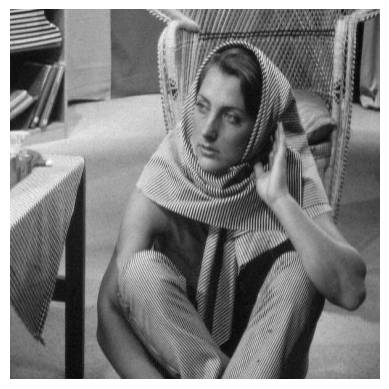

In [5]:
image_dict = get_image_from_url(url, return_image=True, backend="plt", logger=logger)

# show image
plt.imshow(image_dict.image, cmap="gray")
plt.axis('off')
plt.show()

## 2. Load image

You can load a local or internet image by calling `load_image()`

Here are some example as follows.

### Arguments

| args | type | remark |
| :--- | :--- | :----- |
| `path` | PathLikeType | The path of the image, it can be a local path or an internet url |
| `backend` | str | The backend of the returning image. Only used when `return_image` is True. Defauts to "cv2" |
| `logger` | Optional[Logger] | Defaults to None |
| `kwargs` | dict | Other arguments in dict |

### Return

It returns the image in `bytes`, `numpy.ndarray` or `PIL.Image`, which is depend on the backend.

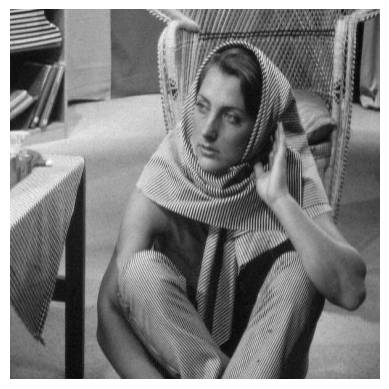

In [6]:
# Case 1: load image from the internet
img = load_image(url, backend="plt", logger=logger)

# show image
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

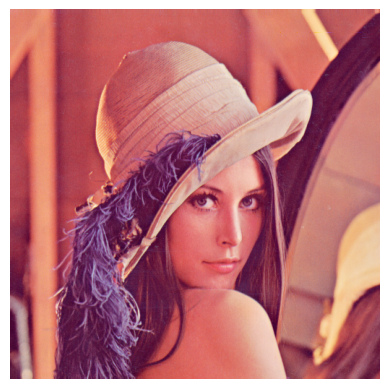

In [7]:
# Case 2: load image from local device with "plt" backend
img = load_image("./examples/Lenna.png", backend="plt", logger=logger)

# show image
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
# Case 3: load local image with "cv2" backend (default backend)
img = load_image("./examples/Lenna.png", logger=logger)
logger.info(type(img))

2024-05-05 12:03:30 | 0 day(s) 00:00:12 | INFO | <class 'numpy.ndarray'>


In [9]:
# Case 4: load local image with "pillow" backend
img = load_image("./examples/Lenna.png", backend="pillow", logger=logger)
logger.info(type(img))

2024-05-05 12:03:30 | 0 day(s) 00:00:12 | INFO | <class 'PIL.PngImagePlugin.PngImageFile'>


In [10]:
# Case 5: load local image with base64 format
img = load_image("./examples/Lenna.png", backend="base64", logger=logger)
logger.info(type(img))

2024-05-05 12:03:30 | 0 day(s) 00:00:12 | INFO | <class 'bytes'>


## 3. Save image

You can save an image locally by calling `save_image()`

Here are some example as follows.

### Arguments

| args | type | remark |
| :--- | :--- | :----- |
| `img` | Any | The image |
| `path` | PathLikeType | The local path to save the image |
| `backend` | str | The backend to save the image. Defauts to "cv2" |
| `logger` | Optional[Logger] | Defaults to None |
| `kwargs` | dict | Other arguments in dict |

### Return

It returns True if success, otherwise returns False.

In [11]:
# Case 1: save image with "cv2" backend (default backend)
img = load_image("./examples/Lenna.png", logger=logger)
save_image(img, "./examples/Lenna.cv2.jpg", logger=logger)

True

In [12]:
# Case 2: save image with "pillow" backend
img = load_image("./examples/Lenna.png", backend="pillow", logger=logger)
save_image(img, "./examples/Lenna.pillow.jpg", backend="pillow", logger=logger)

True

In [13]:
# Case 3: save image with "plt" backend
img = load_image("./examples/Lenna.png", backend="plt", logger=logger)
save_image(img, "./examples/Lenna.plt.jpg", backend="plt", logger=logger)

True

In [14]:
# Case 4: save image with "base64" backend
img = load_image("./examples/Lenna.png", backend="base64", logger=logger)
save_image(img, "./examples/Lenna.base64.jpg", backend="base64", logger=logger)

True